In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [2]:
df = pd.read_csv('Amazon_data.csv')
df.head()

,Unnamed: 0,ASIN,Name,Price,List Price,Features,Image,Rating,Reviews,Supplier,Supplier_url
0,0,B0DHZ6CNDL,Military Smart Watch for Men(Answer/Dial Calls...,$72.99,NaN,➤【Military Grade】SUNKTA smart watch breaks a...,https://m.media-amazon.com/images/I/71pc1LaYUF...,5.0,6,SUNKTA Store,https://www.amazon.com/stores/SUNKTA/page/5C6D...
1,1,B07WLJWMHM,BENYAR Mens Watches Chronograph Date Waterproo...,$39.98,NaN,\n\n \nClasp type \n \nBuckle \n \n\n \nCo...,https://m.media-amazon.com/images/I/81bZU86djq...,4.5,"2,024",CEYADG Store,https://www.amazon.com/stores/CEYADG/page/4FC7...
2,2,B0DK3KQ55X,"Pagani Design Watches for Men, 38mm Dial, Stai...",$69.99,NaN,\n\n \nClasp type \n \nPush Button Foldover ...,https://m.media-amazon.com/images/I/71PWwg5nXy...,4.7,11,Orizontime Store,https://www.amazon.com/stores/Orizontime/page/...
3,3,B09P1GHH3M,FORSINING Vintage Watch for Men Engraved Autom...,$41.99,NaN,\n\n \nItem width \n \n11 centimeters \n \n...,https://m.media-amazon.com/images/I/81jjRDkzcd...,4.2,98,FORSINING Store,https://www.amazon.com/stores/FORSINING/page/A...
4,4,B07JZFQQYL,"Invicta Mens Pro Diver Quartz Watch, Black, 28001",$64.90,NaN,"Black dial, Black silicone band 50mm stainles...",https://m.media-amazon.com/images/I/7135J0dg1g...,4.7,50,Invicta Store,https://www.amazon.com/stores/InvictaStores/pa...


In [3]:
df['Reviews'] = df['Reviews'].str.replace(',','').str.strip().astype(int)
df['Price'] = df['Price'].str.replace('$','').str.strip().astype(float)

In [4]:
df.drop('List Price',axis = 1,inplace=True)
df

,Unnamed: 0,ASIN,Name,Price,Features,Image,Rating,Reviews,Supplier,Supplier_url
0,0,B0DHZ6CNDL,Military Smart Watch for Men(Answer/Dial Calls...,72.99,➤【Military Grade】SUNKTA smart watch breaks a...,https://m.media-amazon.com/images/I/71pc1LaYUF...,5.0,6,SUNKTA Store,https://www.amazon.com/stores/SUNKTA/page/5C6D...
1,1,B07WLJWMHM,BENYAR Mens Watches Chronograph Date Waterproo...,39.98,\n\n \nClasp type \n \nBuckle \n \n\n \nCo...,https://m.media-amazon.com/images/I/81bZU86djq...,4.5,2024,CEYADG Store,https://www.amazon.com/stores/CEYADG/page/4FC7...
2,2,B0DK3KQ55X,"Pagani Design Watches for Men, 38mm Dial, Stai...",69.99,\n\n \nClasp type \n \nPush Button Foldover ...,https://m.media-amazon.com/images/I/71PWwg5nXy...,4.7,11,Orizontime Store,https://www.amazon.com/stores/Orizontime/page/...
3,3,B09P1GHH3M,FORSINING Vintage Watch for Men Engraved Autom...,41.99,\n\n \nItem width \n \n11 centimeters \n \n...,https://m.media-amazon.com/images/I/81jjRDkzcd...,4.2,98,FORSINING Store,https://www.amazon.com/stores/FORSINING/page/A...
4,4,B07JZFQQYL,"Invicta Mens Pro Diver Quartz Watch, Black, 28001",64.90,"Black dial, Black silicone band 50mm stainles...",https://m.media-amazon.com/images/I/7135J0dg1g...,4.7,50,Invicta Store,https://www.amazon.com/stores/InvictaStores/pa...
...,...,...,...,...,...,...,...,...,...,...
262,262,B0733PT6VC,Bulova Men's Marine Star Series C Stainless St...,256.00,\n\n \nMaterial \n \nStainless-steel \n \n\...,https://m.media-amazon.com/images/I/81GbXYQRp8...,4.6,499,Bulova Store,https://www.amazon.com/stores/BulovaCorporatio...
263,263,B09VGFS21M,"FILIEKEU Men Smart Watch for Android iOS, Blue...",49.99,\n\n \nItem width \n \n4.2 centimeters \n \...,https://m.media-amazon.com/images/I/615S7jF9tT...,4.0,1657,FILIEKEU,https://www.amazon.com/FILIEKEU/b/ref=bl_sl_s_...
264,264,B0BTBX691N,"Smart Watch for Men(Answer/Make Call),Alexa Bu...",77.99,【Make/Answer Call】After connecting to your p...,https://m.media-amazon.com/images/I/61IiAwla6H...,4.1,7145,Woneligo Store,https://www.amazon.com/stores/WoneligoSmartwat...
265,265,B07G5Q8LKH,Bulova Men's Crystal Octava Chronograph Quartz...,301.96,"From the Bulova Men's Crystal Collection, mak...",https://m.media-amazon.com/images/I/71Yb3ng2PB...,4.7,1852,Bulova Store,https://www.amazon.com/stores/BulovaCorporatio...


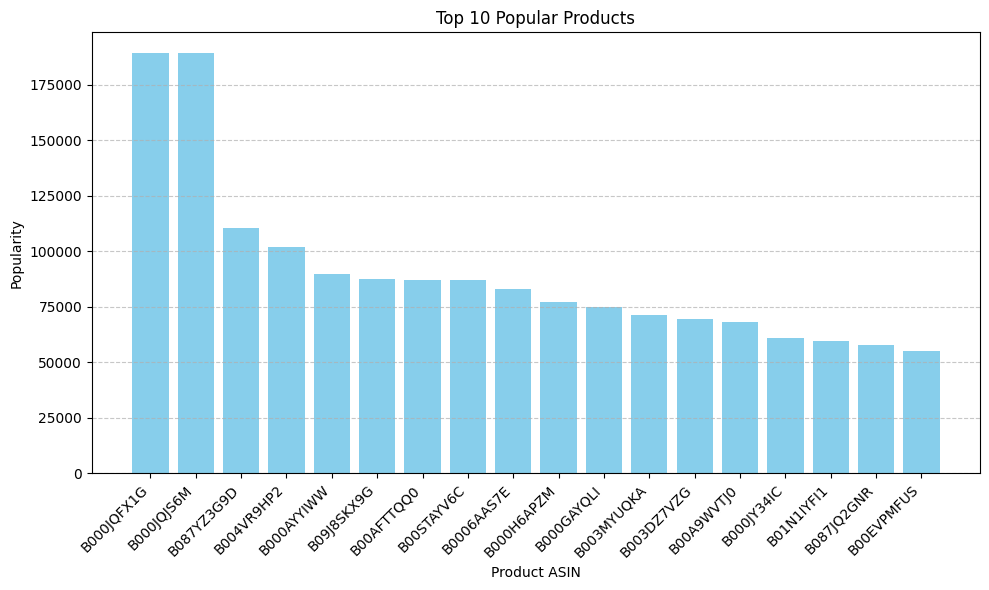

In [15]:
#Popular Product
df['Popularity'] = df['Rating']*df['Reviews']
popularity = df.nlargest(20,'Popularity')
plt.figure(figsize=(10,6))
plt.bar(popularity['ASIN'],popularity['Popularity'],color='skyblue')
plt.title('Top 10 Popular Products')
plt.xlabel('Product ASIN')
plt.ylabel('Popularity')
plt.xticks(rotation=45,ha='right')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()

## Top Five Suppliers With Most Number of Products

/var/folders/6k/9lcwl8q960scjdl32lqz8h_80000gn/T/ipykernel_80974/2885503688.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='num_products', y='Supplier', data=top_5_products, palette='viridis')


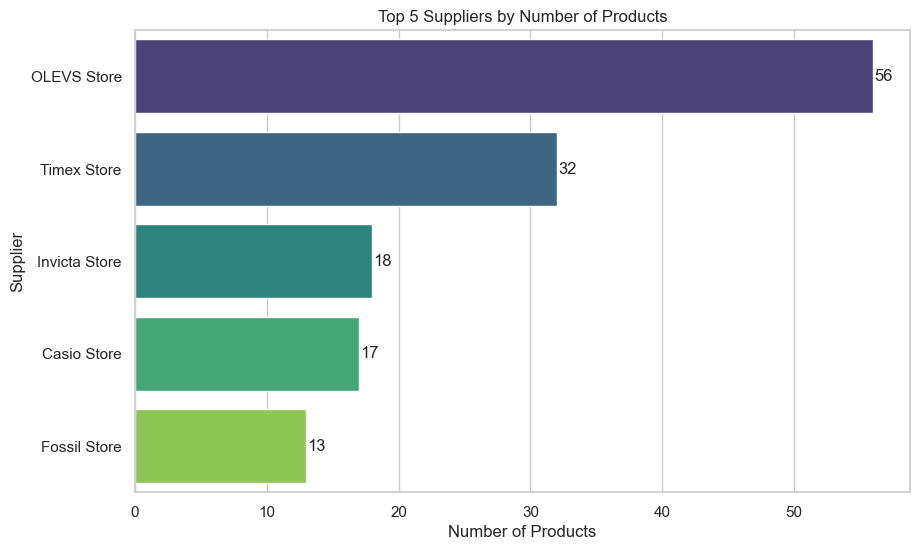

In [35]:
product_counts = df['Supplier'].value_counts().reset_index()
product_counts.columns = ['Supplier','num_products']
top_5_products = product_counts.sort_values(by='num_products',ascending=False).head(5)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='num_products', y='Supplier', data=top_5_products, palette='viridis')

for p in ax.patches:
    width = p.get_width()
    plt.text(width + 0.1, 
             p.get_y() + p.get_height() / 2, 
             f'{int(width)}',
             va='center')  

plt.title('Top 5 Suppliers by Number of Products')
plt.xlabel('Number of Products')
plt.ylabel('Supplier')
plt.show()

## Top 5 Suppliers with Highest Ratings

In [39]:
max_rating = df.groupby('Supplier')['Rating'].max().reset_index()
top_5_by_rating = max_rating.sort_values(by='Rating',ascending=False).head(5)
top_5_by_rating

,Supplier,Rating
41,OUPINKE Store,5.0
50,SUNKTA Store,5.0
31,Invicta Store,4.9
23,G-Shock Store,4.7
15,Citizen Store,4.7


/var/folders/6k/9lcwl8q960scjdl32lqz8h_80000gn/T/ipykernel_80974/2803060321.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Rating',y='Supplier',data=top_5_by_rating,palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

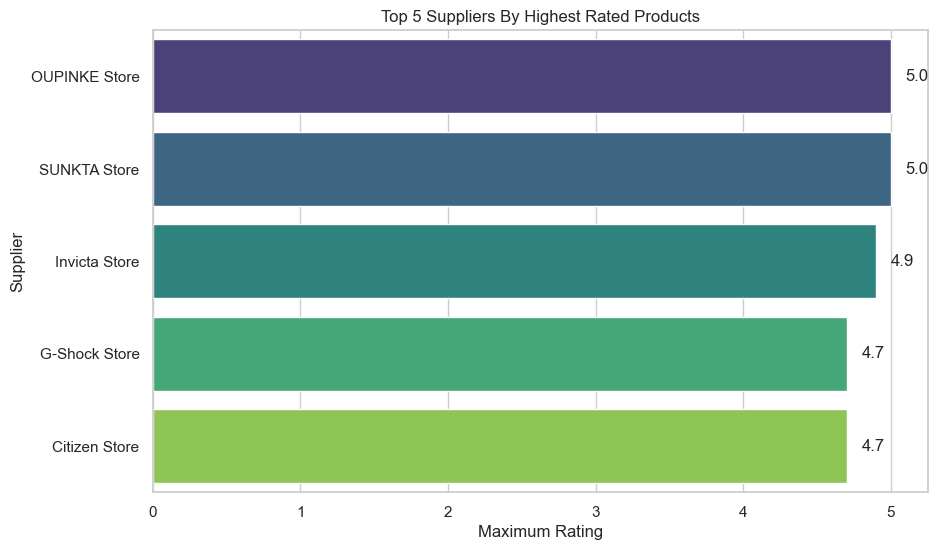

In [41]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Rating',y='Supplier',data=top_5_by_rating,palette='viridis')
for p in ax.patches:
    width = p.get_width()
    plt.text(width+0.1,
             p.get_y()+p.get_height()/2,
             f'{float(width)}',
             va='center')
plt.title('Top 5 Suppliers By Highest Rated Products')
plt.xlabel('Maximum Rating')
plt.ylabel('Supplier')
plt.show    

## Feature Keywords Analysis

#### Top 50 Keywords

In [49]:
# Extract Matching Keywords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def extract_words(text):
    text = text.translate(str.maketrans("","",string.punctuation)).lower()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return words
all_keyword = []
for feature in df['Features']:
    all_keyword.extend(extract_words(feature))
keyword_freq = Counter(all_keyword)
keyword_df = pd.DataFrame(keyword_freq.most_common(),columns=['Keywords','Frequency']).head(50)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hydermac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


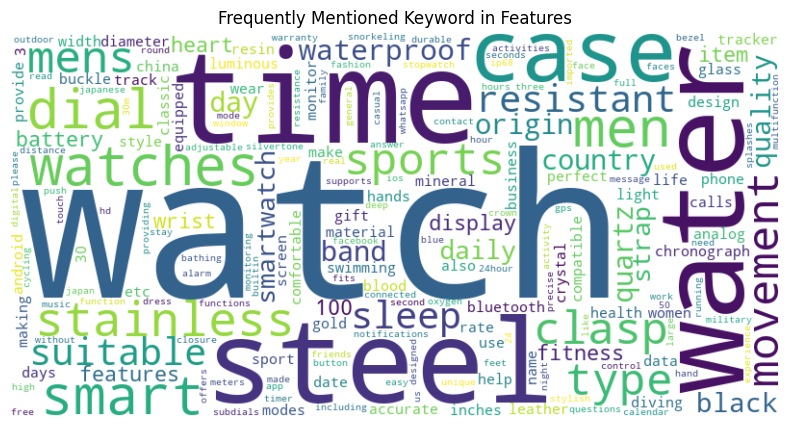

In [10]:
word_cloud = WordCloud(width=800,height=400,background_color='white').generate_from_frequencies(keyword_freq)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.title('Frequently Mentioned Keyword in Features')
plt.show()

### Feature Rating Correlation

In [75]:
keyword_df = keyword_df.head(25)
new_df = df
for keyword in keyword_df['Keywords']:
    new_df[keyword] = new_df['Features'].apply(lambda x: 1 if keyword in x.lower() else 0)
numeric_df = new_df.drop(columns=['ASIN','Name','Price','Features','Image','Supplier','Supplier_url'])
correlation_df = numeric_df.corr()['Rating'].drop('Rating').reset_index()
correlation_df.columns = ['Keyword','Correlation']
correlation_df['Abs_Correlation'] = correlation_df['Correlation'].abs()
correlation_df = correlation_df.sort_values(by='Abs_Correlation',ascending=False)


/var/folders/6k/9lcwl8q960scjdl32lqz8h_80000gn/T/ipykernel_82399/511607957.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation',y='Keyword',data=correlation_df,palette='coolwarm')


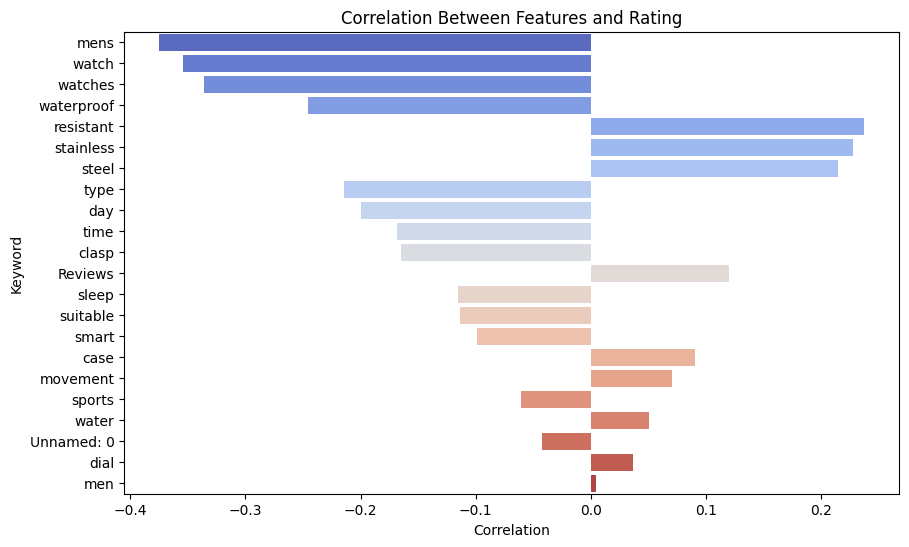

In [76]:
plt.figure(figsize=(10,6))
sns.barplot(x='Correlation',y='Keyword',data=correlation_df,palette='coolwarm')
plt.title('Correlation Between Features and Rating')
plt.xlabel('Correlation')
plt.ylabel('Keyword')
plt.show()

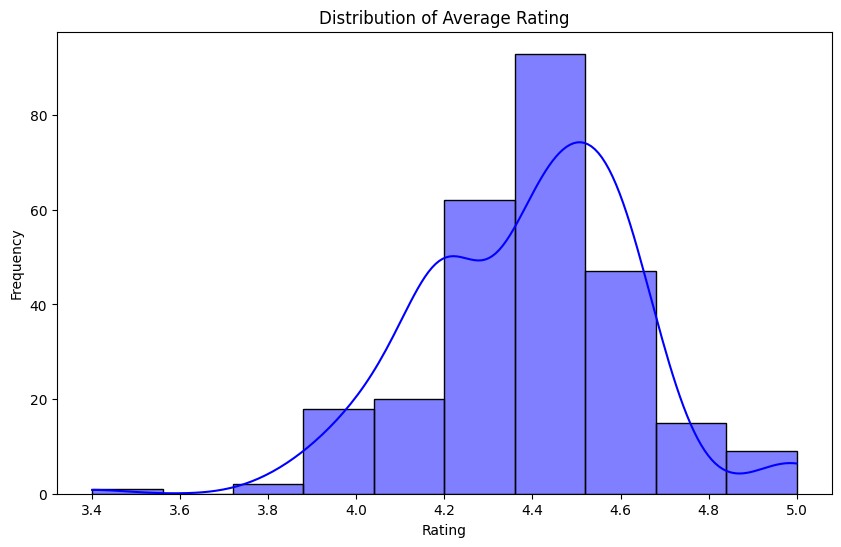

In [66]:
#Average Rating Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Rating'],bins=10,kde=True,color='blue')
plt.title('Distribution of Average Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Identify Products with High Reviews but Low Ratings

In [85]:
high_review_threshold = df['Reviews'].quantile(0.75)
low_rating_threshold = df['Rating'].quantile(0.25)
dissatisfied_products = df[(df['Reviews']>high_review_threshold) & (df['Rating']<low_rating_threshold)]
dissatisfied_products

,Unnamed: 0,ASIN,Name,Price,Features,Image,Rating,Reviews,Supplier,Supplier_url,...,mens,clasp,type,sports,movement,resistant,sleep,suitable,waterproof,day
95,95,B07RHYYFSK,MEGALITH Mens Watches Waterproof Digital Milit...,$45.99,\n\n \nClasp type \n \nBuckle \n \n\n \nIt...,https://m.media-amazon.com/images/I/71epWt+deT...,4.1,4085,MEGALITH Store,https://www.amazon.com/stores/MEGALITH/page/75...,...,0,1,1,0,0,0,0,0,0,0
199,199,B09J8SKX9G,GRV Smart Watch for iOS and Android Phones (An...,$29.99,【Smart Watch Compatible with iPhone/Android ...,https://m.media-amazon.com/images/I/61uC5wH8-Q...,4.0,21852,GRV Store,https://www.amazon.com/stores/GRV/page/88AD777...,...,1,0,0,1,0,0,1,0,1,1
222,222,B09J8SKX9G,GRV Smart Watch for iOS and Android Phones (An...,$29.99,【Smart Watch Compatible with iPhone/Android ...,https://m.media-amazon.com/images/I/61uC5wH8-Q...,4.0,21852,GRV Store,https://www.amazon.com/stores/GRV/page/88AD777...,...,1,0,0,1,0,0,1,0,1,1
256,256,B0C8CHJLH1,RUIMEN Smart Watches for Men Women (Answer/Mak...,$27.99,【Large HD Color Screen & IP68 Waterproof】The...,https://m.media-amazon.com/images/I/61PajHLMfl...,4.1,11182,RUIMEN Store,https://www.amazon.com/stores/RUIMEN/page/849D...,...,0,0,0,1,0,0,1,0,1,0
264,264,B0BTBX691N,"Smart Watch for Men(Answer/Make Call),Alexa Bu...",$77.99,【Make/Answer Call】After connecting to your p...,https://m.media-amazon.com/images/I/61IiAwla6H...,4.1,7145,Woneligo Store,https://www.amazon.com/stores/WoneligoSmartwat...,...,0,0,0,1,0,0,1,0,1,0


### Highlight Product with Few Reviews But High Ratings

In [86]:
few_reviews_threshold = df['Reviews'].quantile(0.25)
high_rating_threshold = df['Rating'].quantile(0.75)
hidden_gem = df[(df['Reviews'] < few_reviews_threshold) & (df['Rating'] > high_rating_threshold)]
hidden_gem

,Unnamed: 0,ASIN,Name,Price,Features,Image,Rating,Reviews,Supplier,Supplier_url,...,mens,clasp,type,sports,movement,resistant,sleep,suitable,waterproof,day
0,0,B0DHZ6CNDL,Military Smart Watch for Men(Answer/Dial Calls...,$72.99,➤【Military Grade】SUNKTA smart watch breaks a...,https://m.media-amazon.com/images/I/71pc1LaYUF...,5.0,6,SUNKTA Store,https://www.amazon.com/stores/SUNKTA/page/5C6D...,...,0,0,0,1,1,1,1,0,1,1
2,2,B0DK3KQ55X,"Pagani Design Watches for Men, 38mm Dial, Stai...",$69.99,\n\n \nClasp type \n \nPush Button Foldover ...,https://m.media-amazon.com/images/I/71PWwg5nXy...,4.7,11,Orizontime Store,https://www.amazon.com/stores/Orizontime/page/...,...,0,1,1,0,0,0,0,0,0,0
4,4,B07JZFQQYL,"Invicta Mens Pro Diver Quartz Watch, Black, 28001",$64.90,"Black dial, Black silicone band 50mm stainles...",https://m.media-amazon.com/images/I/7135J0dg1g...,4.7,50,Invicta Store,https://www.amazon.com/stores/InvictaStores/pa...,...,0,0,0,0,0,1,0,0,0,1
17,17,B0DFQJF45P,Timex Men's Legacy 41mm Watch - Stainless Stee...,$122.10,41mmmm stainless steel case 8 inch black two-...,https://m.media-amazon.com/images/I/71fqZIZGGq...,4.7,32,Timex Store,https://www.amazon.com/stores/Timex/page/4619E...,...,0,0,0,0,0,1,0,0,0,0
31,31,B0DHZ6CNDL,Military Smart Watch for Men(Answer/Dial Calls...,$72.99,➤【Military Grade】SUNKTA smart watch breaks a...,https://m.media-amazon.com/images/I/71pc1LaYUF...,5.0,6,SUNKTA Store,https://www.amazon.com/stores/SUNKTA/page/5C6D...,...,0,0,0,1,1,1,1,0,1,1
32,32,B0DK3N3ZVL,"Pagani Design Watches for Men, 38mm Dial, Stai...",$63.99,Janpan TMI VH31 movement: The vh31 is a quart...,https://m.media-amazon.com/images/I/81qi0ySKai...,4.7,11,Orizontime Store,https://www.amazon.com/stores/Orizontime/page/...,...,0,0,0,0,1,1,0,0,1,0
88,88,B0DHZ6CNDL,Military Smart Watch for Men(Answer/Dial Calls...,$72.99,➤【Military Grade】SUNKTA smart watch breaks a...,https://m.media-amazon.com/images/I/71pc1LaYUF...,5.0,6,SUNKTA Store,https://www.amazon.com/stores/SUNKTA/page/5C6D...,...,0,0,0,1,1,1,1,0,1,1
101,101,B0DGKX2PD6,OUPINKE Watch for Men Automatic Wristwatch Sap...,$368.00,\n\n \nClasp type \n \nDeployment Clasp \n ...,https://m.media-amazon.com/images/I/71zyJZ+-0z...,5.0,6,OUPINKE Store,https://www.amazon.com/stores/OUPINKE/page/F91...,...,0,1,1,0,0,0,0,0,0,0
139,139,B0D3QZQVLJ,Invicta Racing Men 52mm Plastic Black Black di...,$39.90,"Case Size and Tone: 52mm, Black Movement Type...",https://m.media-amazon.com/images/I/71Fgbr+AnX...,4.9,24,Invicta Store,https://www.amazon.com/stores/InvictaWatches/p...,...,0,1,1,0,1,1,0,0,0,0
169,169,B0DHZ6CNDL,Military Smart Watch for Men(Answer/Dial Calls...,$72.99,➤【Military Grade】SUNKTA smart watch breaks a...,https://m.media-amazon.com/images/I/71pc1LaYUF...,5.0,6,SUNKTA Store,https://www.amazon.com/stores/SUNKTA/page/5C6D...,...,0,0,0,1,1,1,1,0,1,1


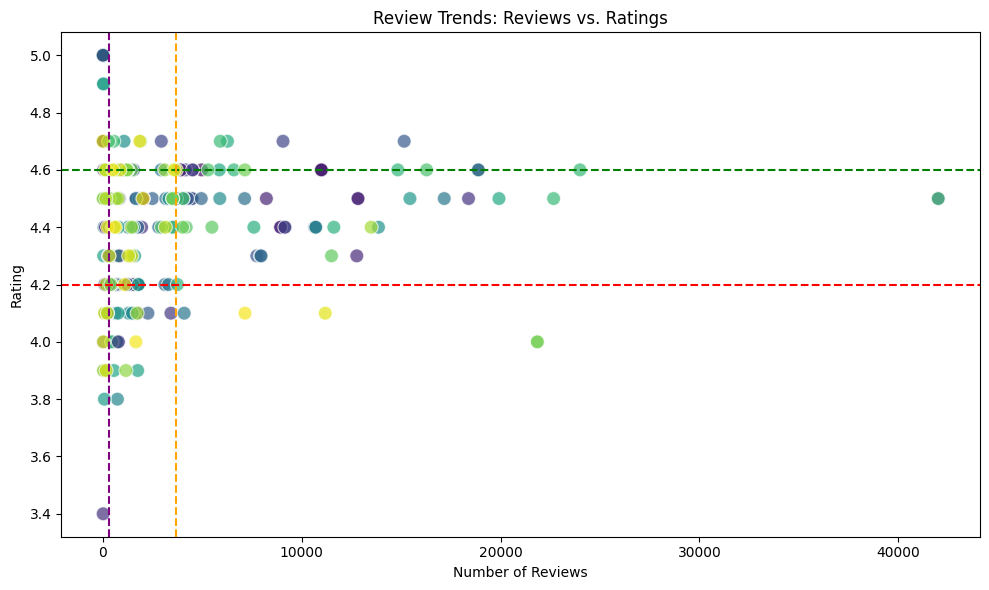

In [95]:
# Scatter plot: Reviews vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Reviews', y='Rating', data=df, hue='ASIN', s=100, palette='viridis',alpha=0.7,legend=False)
plt.axhline(y=low_rating_threshold, color='red', linestyle='--', label='Low Rating Threshold')
plt.axhline(y=high_rating_threshold, color='green', linestyle='--', label='High Rating Threshold')
plt.axvline(x=high_review_threshold, color='orange', linestyle='--', label='High Review Threshold')
plt.axvline(x=few_reviews_threshold, color='purple', linestyle='--', label='Few Review Threshold')
plt.title('Review Trends: Reviews vs. Ratings')
plt.xlabel('Number of Reviews')
plt.ylabel('Rating')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [5]:
low_price_threshold = df['Price'].quantile(0.25)
high_price_threshold = df['Price'].quantile(0.75)
low_rating_threshold = df['Rating'].quantile(0.25)
high_rating_threshold = df['Rating'].quantile(0.75)
value_for_money = df[(df['Price']<low_price_threshold) & (df['Rating']>high_rating_threshold)]
overpriced = df[(df['Price']>high_price_threshold) & (df['Rating']<low_rating_threshold)]
overpriced

,Unnamed: 0,ASIN,Name,Price,Features,Image,Rating,Reviews,Supplier,Supplier_url
27,27,B0DBHWQ58D,Motorola Moto Watch 120 - Premium Smartwatch f...,129.97,Long Battery Life - Unleash your potential w...,https://m.media-amazon.com/images/I/510fsAqx4v...,4.1,144,Motorola,https://www.amazon.com/Motorola/b/ref=bl_dp_s_...
89,89,B0CT4VCLW5,"Men's Smart Watch Round HD 1.53"" Gold Blue Sma...",79.00,OHUGNA Smart Watch for men: The OHUGNA men's...,https://m.media-amazon.com/images/I/71qk-M-J3Z...,4.1,135,OHUGNA Store,https://www.amazon.com/stores/OHUGNA/page/9DD7...
218,218,B00189VBSM,SEIKO Men's Watches 5 SNKE03-4,130.99,Case Width: 1.4 inches (36 mm) Wrist Circumfe...,https://m.media-amazon.com/images/I/611juWDOc-...,3.9,1155,SEIKO Store,https://www.amazon.com/stores/Seiko/page/45C89...
254,254,B0D4RDHLQN,Perry Ellis Solar Powered Mens Watch | Vegan L...,79.99,\n\n \nClasp type \n \nTang Buckle \n \n\n ...,https://m.media-amazon.com/images/I/612LtO+O9k...,4.0,25,Perry Ellis Store,https://www.amazon.com/stores/PerryEllis/page/...


In [6]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(df, x='Price', y='Rating', color='ASIN', hover_name='ASIN',
                 title='Price vs. Rating: Identifying Value-for-Money and Overpriced Products',
                 labels={'Price': 'Price', 'Rating': 'Rating'})

# Add threshold lines
fig.add_hline(y=low_rating_threshold, line_dash="dash", line_color="red", annotation_text="Low Rating Threshold")
fig.add_hline(y=high_rating_threshold, line_dash="dash", line_color="green", annotation_text="High Rating Threshold")
fig.add_vline(x=low_price_threshold, line_dash="dash", line_color="blue", annotation_text="Low Price Threshold")
fig.add_vline(x=high_price_threshold, line_dash="dash", line_color="orange", annotation_text="High Price Threshold")

# Show the plot
fig.show()